In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

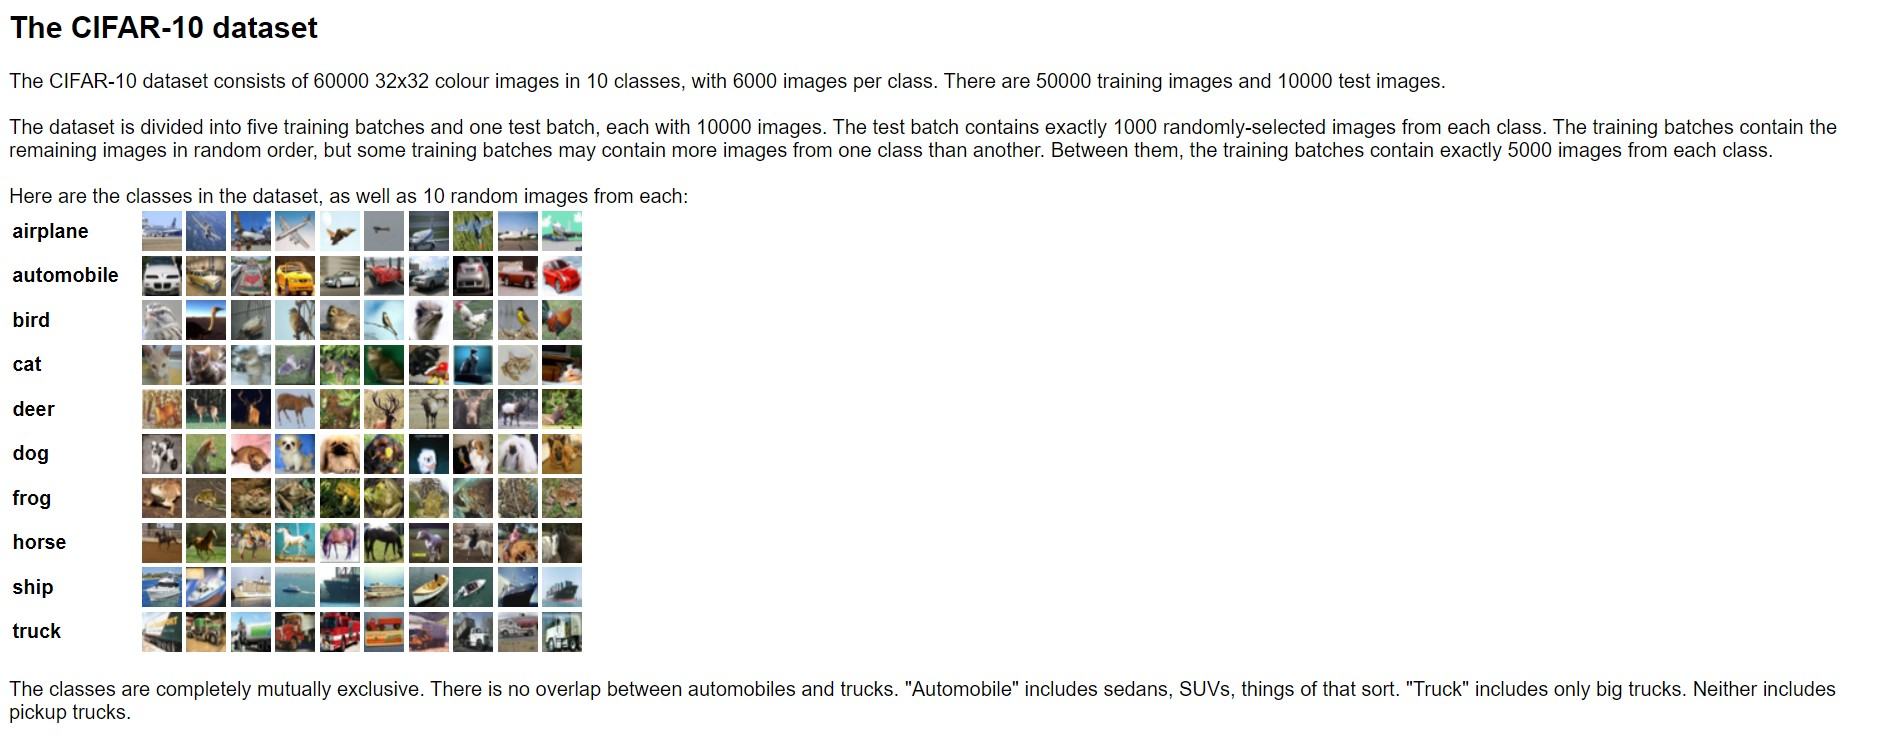

In [3]:
# Normalizing train and test data
X_train = X_train/255    # 255 number of pixels
X_test = X_test/255

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [4]:
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

(<matplotlib.image.AxesImage at 0x140e1941a88>, 7)

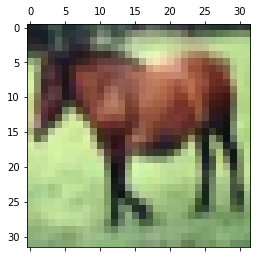

In [5]:
## printing images corresponding to some index
## here index 7 refers to horse

plt.matshow(X_train[7]) , y_train[7]

we can do this in following function.

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X,y,index):
    plt.matshow(X[index])
    plt.xlabel(classes[y[index]])  

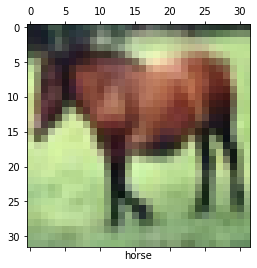

In [8]:
plot_sample(X_train, y_train, 7)  

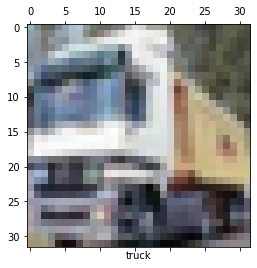

In [9]:
plot_sample(X_train, y_train, 1)

## ANN

In [10]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')

])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 75s 47ms/step - loss: 1.8184 - accuracy: 0.3507
Epoch 2/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.6300 - accuracy: 0.4241
Epoch 3/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.5518 - accuracy: 0.4529
Epoch 4/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4906 - accuracy: 0.4743
Epoch 5/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.4411 - accuracy: 0.4923


In [11]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.63      0.54      1000
           1       0.67      0.50      0.58      1000
           2       0.46      0.21      0.29      1000
           3       0.35      0.36      0.36      1000
           4       0.43      0.41      0.42      1000
           5       0.45      0.31      0.37      1000
           6       0.51      0.58      0.54      1000
           7       0.47      0.64      0.54      1000
           8       0.59      0.64      0.62      1000
           9       0.51      0.62      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



we can clearly see that, the accuracy of ANN model is very low. i.e. we'll use CNN on this dataset.

## CNN

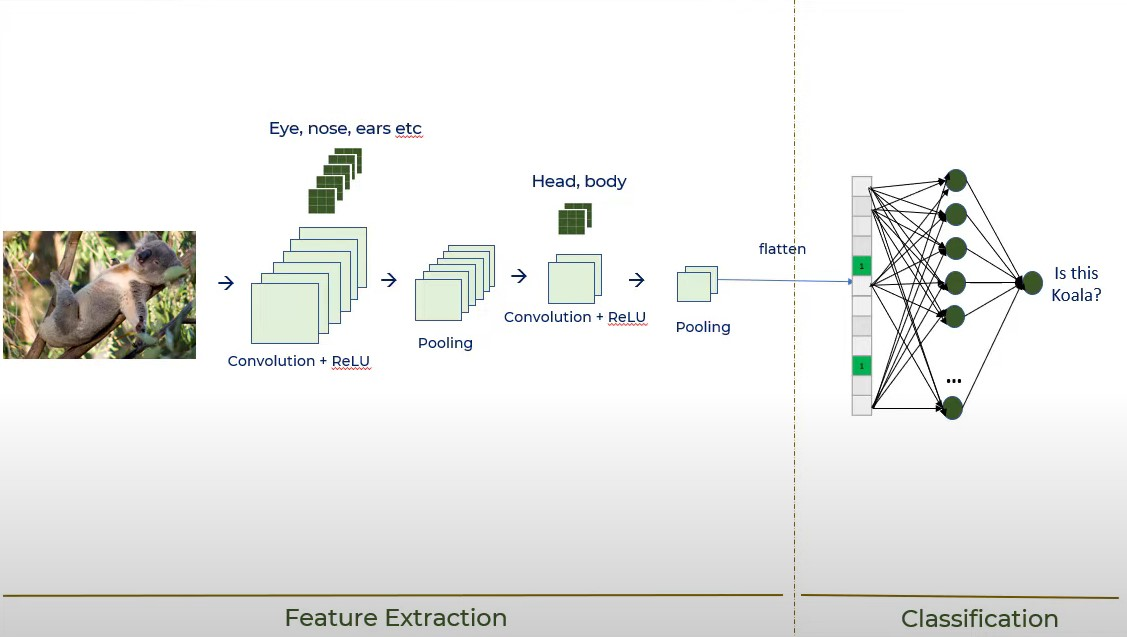

In [12]:
cnn = models.Sequential([
    # (Feature Extraction)
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # (Classification)
    
    layers.Flatten(),
    layers.Dense(56, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.fit(X_train, y_train, epochs = 25)

Epoch 1/25
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5412 - accuracy: 0.4457
Epoch 2/25
1563/1563 [==============================] - ETA: 0s - loss: 1.2144 - accuracy: 0.57 - 29s 18ms/step - loss: 1.2145 - accuracy: 0.5717
Epoch 3/25
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0833 - accuracy: 0.6226
Epoch 4/25
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0099 - accuracy: 0.6491
Epoch 5/25
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9546 - accuracy: 0.6675
Epoch 6/25
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9066 - accuracy: 0.6850
Epoch 7/25
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8683 - accuracy: 0.6991
Epoch 8/25
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8379 - accuracy: 0.7093
Epoch 9/25
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8056 - accuracy: 0.7213
Epoch 10/25
1563/1563 

In [13]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.1174 - accuracy: 0.6661


[1.117409348487854, 0.666100025177002]

In [14]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.69      0.72      1000
           1       0.80      0.77      0.79      1000
           2       0.67      0.43      0.53      1000
           3       0.43      0.55      0.48      1000
           4       0.55      0.67      0.60      1000
           5       0.55      0.62      0.58      1000
           6       0.80      0.69      0.74      1000
           7       0.75      0.70      0.72      1000
           8       0.81      0.76      0.78      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [15]:
## how np.argmax works?
np.argmax([1,23,3,44,5])  ## it returns the index number of max values

3

In [16]:
## model testing.

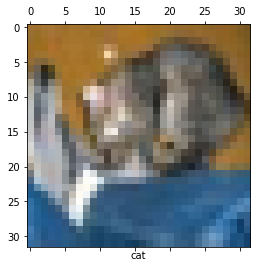

In [17]:
plot_sample(X_test, y_test, 0)

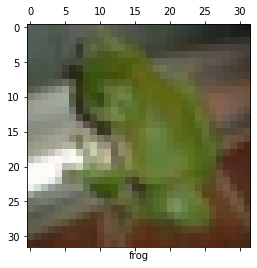

In [18]:
plot_sample(X_test, y_test, 7)